In [57]:
### import numpy as np 
import pandas as pd
from pandas import DataFrame
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np
from collections import defaultdict
# from matplotlib.colors import rgb2hex, colorConverter

In [58]:
outprefix_229E = "229E_Spike_charge"
df_229E_full = pd.read_csv('229E_91_2022-1-27_spike_charge_table.csv', sep=",",index_col='Genome', na_values=['-'])
df_229E_full.head()


,charge
Genome,
MW587038|Human_CoV_229E|China|May-2016/Dec-2017|2017|Homo_sapiens,-7.30
MW587037|Human_CoV_229E|China|May-2016/Dec-2017|2017|Homo_sapiens,-7.30
MW587035|Human_CoV_229E|China|May-2016/Dec-2017|2017|Homo_sapiens,-7.26
OK625404|Human_CoV_229E|South_Korea|2017|2017|Homo_sapiens,-13.43
NC_028752|Camel_alphaCoV|Saudi_Arabia|Mar-2015|2015|Camel,-16.47


In [59]:
# add columns with details
# extract date
def extract_date (row):
    id_pieces1= (row['genome_id']).split("|")
    if id_pieces1[-2] == "None":
        date = "1980"
    else:
        date = id_pieces1[-2]
    return date

def extract_lineage (row):
    id_pieces2= (row['genome_id']).split("|")    
    return  id_pieces2[1]

def extract_country (row):
    id_pieces3= (row['genome_id']).split("|") 
    return id_pieces3[2]

def extract_host (row):
    id_pieces3= (row['genome_id']).split("|") 
    return id_pieces3[-1]
# Make column with contig_id from index

df_229E_full['genome_id'] = df_229E_full.index
               
# # #apply to all rows 
df_229E_full['Year'] = df_229E_full.apply (lambda row: extract_date (row),axis=1)

# # #convert date string to datetime object
# # df_229E_full['Sample_date'] = pd.to_datetime(df_229E_full['Sample_date']).year #need to add .year to specify only year
# df_229E_full['Year'] = df_229E_full.Year.astype(np.datetime64)
# df_229E_full['Year'] = df_229E_full.Year.dt.year

# #apply to all rows 
df_229E_full['Lineage'] = df_229E_full.apply (lambda row: extract_lineage (row),axis=1)

df_229E_full['Country'] = df_229E_full.apply (lambda row: extract_country (row),axis=1)

df_229E_full['host'] = df_229E_full.apply (lambda row: extract_host (row),axis=1)

df_229E_full.to_csv(outprefix_229E +'_sample_total_charge_date.csv', sep=',')
df_229E_full


,charge,genome_id,Year,Lineage,Country,host
Genome,,,,,,
MW587038|Human_CoV_229E|China|May-2016/Dec-2017|2017|Homo_sapiens,-7.30,MW587038|Human_CoV_229E|China|May-2016/Dec-201...,2017,Human_CoV_229E,China,Homo_sapiens
MW587037|Human_CoV_229E|China|May-2016/Dec-2017|2017|Homo_sapiens,-7.30,MW587037|Human_CoV_229E|China|May-2016/Dec-201...,2017,Human_CoV_229E,China,Homo_sapiens
MW587035|Human_CoV_229E|China|May-2016/Dec-2017|2017|Homo_sapiens,-7.26,MW587035|Human_CoV_229E|China|May-2016/Dec-201...,2017,Human_CoV_229E,China,Homo_sapiens
OK625404|Human_CoV_229E|South_Korea|2017|2017|Homo_sapiens,-13.43,OK625404|Human_CoV_229E|South_Korea|2017|2017|...,2017,Human_CoV_229E,South_Korea,Homo_sapiens
NC_028752|Camel_alphaCoV|Saudi_Arabia|Mar-2015|2015|Camel,-16.47,NC_028752|Camel_alphaCoV|Saudi_Arabia|Mar-2015...,2015,Camel_alphaCoV,Saudi_Arabia,Camel
...,...,...,...,...,...,...
KF293665|Human_CoV_229E|Sweden|None|None|Homo_sapiens,-13.43,KF293665|Human_CoV_229E|Sweden|None|None|Homo_...,1980,Human_CoV_229E,Sweden,Homo_sapiens
KF293664|Human_CoV_229E|Sweden|None|None|Homo_sapiens,-13.43,KF293664|Human_CoV_229E|Sweden|None|None|Homo_...,1980,Human_CoV_229E,Sweden,Homo_sapiens
JX503061|Human_CoV_229E|Italy|2009|2009|Homo_sapiens,-6.33,JX503061|Human_CoV_229E|Italy|2009|2009|Homo_s...,2009,Human_CoV_229E,Italy,Homo_sapiens


In [60]:
df_229E_full['host'].value_counts()

Homo_sapiens     45
Camel            31
None              3
Vicugna_pacos     1
Name: host, dtype: int64

No handles with labels found to put in legend.


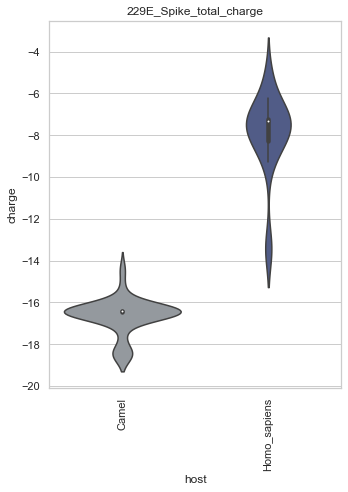

In [61]:
sns.set(style="whitegrid")
my_order =['Camel','Homo_sapiens']
           
color_dictionary2 = {'Homo_sapiens': '#485690', 'Camel':'#9299a0', 'None':'c8c2be', 'Vicugna_pacos':'c8c2be'}
this_palette = ['#9299a0', '#485690']

fig = plt.figure(figsize=(5,7))
plt.legend(loc='upper right', bbox_to_anchor=(1, 0.9))

# ax = sns.violinplot(x="Lineage", y="charge", color='#e45e32', data=df_Dec20_Feb21_full, dodge=False, order=my_order, s=5)
# ax = sns.violinplot(x="host", y="charge", hue="Country", data=df_MERSCoV_full, palette=many, order=my_order, dodge=False)
# ax = sns.violinplot(x="host", y="charge", data=df_229E_full, palette=many, order=my_order, dodge=False)
ax = sns.violinplot(x="host", y="charge", data=df_229E_full, palette=this_palette, order=my_order, dodge=False)

#sns.despine(offset=10, trim=True)
ax.legend_.remove()
ax.set_title('229E_Spike_total_charge')

# plt.legend(loc='upper left', bbox_to_anchor=(1, 0.9))
# plt.legend(loc='upper right')
# plt.ylim(250, 500)
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('229E_spike_total_charge_violin_plot_by_host.pdf',bbox_inches="tight") #bbox_inches="tight" important avoids cutoff
plt.savefig('229E_spike_total_charge_violin_plot_by_host.jpg',bbox_inches="tight", dpi = 300) #bbox_inches="tight" important avoids cutoff



In [62]:
outprefix_OC43 = "OC43_Spike_charge"
df_OC43_full = pd.read_csv('OC43_235_2022-1-27_spike_charge_table.csv', sep=",",index_col='Genome', na_values=['-'])
df_OC43_full.head()

,charge
Genome,
MW587042|Human_CoV_OC43|China|May-2016/Dec-2017|2017|Homo_sapiens,-17.70
MW587040|Human_CoV_OC43|China|May-2016/Dec-2017|2017|Homo_sapiens,-17.70
MW938760|Human_CoV_OC43|Hong_Kong|08-Aug-2019|2019|Homo_sapiens,-18.70
MW202339|Human_CoV_OC43|USA|2018|2018|Homo_sapiens,-13.74
LC654456|Human_CoV_OC43|Japan|2016|2016|Homo_sapiens,-13.75


In [63]:
# add columns with details
# extract date
def extract_date (row):
    id_pieces1= (row['genome_id']).split("|")
    if id_pieces1[-2] == "None":
        date = "1970"
    else:
        date = id_pieces1[-2]
    return date

def extract_lineage (row):
    id_pieces2= (row['genome_id']).split("|")    
    return  id_pieces2[1]

def extract_country (row):
    id_pieces3= (row['genome_id']).split("|") 
    return id_pieces3[2]

def extract_host (row):
    id_pieces3= (row['genome_id']).split("|") 
    return id_pieces3[-1]
# Make column with contig_id from index

df_OC43_full['genome_id'] = df_OC43_full.index
               
# # #apply to all rows 
df_OC43_full['Year'] = df_OC43_full.apply (lambda row: extract_date (row),axis=1)

# # #convert date string to datetime object
# # df_OC43_full['Sample_date'] = pd.to_datetime(df_OC43_full['Sample_date']).year #need to add .year to specify only year
# df_OC43_full['Year'] = df_OC43_full.Year.astype(np.datetime64)
# df_OC43_full['Year'] = df_OC43_full.Year.dt.year

# #apply to all rows 
df_OC43_full['Lineage'] = df_OC43_full.apply (lambda row: extract_lineage (row),axis=1)

df_OC43_full['Country'] = df_OC43_full.apply (lambda row: extract_country (row),axis=1)

df_OC43_full['host'] = df_OC43_full.apply (lambda row: extract_host (row),axis=1)

df_OC43_full.to_csv(outprefix_OC43 +'_sample_total_charge_date.csv', sep=',')
df_OC43_full


,charge,genome_id,Year,Lineage,Country,host
Genome,,,,,,
MW587042|Human_CoV_OC43|China|May-2016/Dec-2017|2017|Homo_sapiens,-17.70,MW587042|Human_CoV_OC43|China|May-2016/Dec-201...,2017,Human_CoV_OC43,China,Homo_sapiens
MW587040|Human_CoV_OC43|China|May-2016/Dec-2017|2017|Homo_sapiens,-17.70,MW587040|Human_CoV_OC43|China|May-2016/Dec-201...,2017,Human_CoV_OC43,China,Homo_sapiens
MW938760|Human_CoV_OC43|Hong_Kong|08-Aug-2019|2019|Homo_sapiens,-18.70,MW938760|Human_CoV_OC43|Hong_Kong|08-Aug-2019|...,2019,Human_CoV_OC43,Hong_Kong,Homo_sapiens
MW202339|Human_CoV_OC43|USA|2018|2018|Homo_sapiens,-13.74,MW202339|Human_CoV_OC43|USA|2018|2018|Homo_sap...,2018,Human_CoV_OC43,USA,Homo_sapiens
LC654456|Human_CoV_OC43|Japan|2016|2016|Homo_sapiens,-13.75,LC654456|Human_CoV_OC43|Japan|2016|2016|Homo_s...,2016,Human_CoV_OC43,Japan,Homo_sapiens
...,...,...,...,...,...,...
AY585229|Human_CoV_OC43|France|None|None|None,-15.85,AY585229|Human_CoV_OC43|France|None|None|None,1970,Human_CoV_OC43,France,None
AY585228|Human_CoV_OC43|USA|None|None|None,-15.85,AY585228|Human_CoV_OC43|USA|None|None|None,1970,Human_CoV_OC43,USA,None
AY391777|Human_CoV_OC43|None|None|None|None,-13.86,AY391777|Human_CoV_OC43|None|None|None|None,1970,Human_CoV_OC43,None,None


In [64]:
df_OC43_full['host'].value_counts()

Homo_sapiens             184
None                      29
Pan_troglodytes_verus      4
Name: host, dtype: int64

In [65]:
outprefix_PHEV = "PHEV_Spike_charge"
df_PHEV_full = pd.read_csv('PHEV_14_2022-3-26_spike_charge_table.csv', sep=",",index_col='Genome', na_values=['-'])
df_PHEV_full.head()

,charge
Genome,
MF083115|PHEV|China|Mar-2014|2014|Sus_scrofa_scrofa,-19.61
KY994645|PHEV|China|21-Aug-2008|2008|Sus_scrofa_scrofa,-21.61
MW165134|PHEV|USA|1970|1970|Sus_scrofa_scrofa,-17.70
KY419112|PHEV|USA|01-Aug-2015|2015|Sus_scrofa_scrofa,-21.73
KY419111|PHEV|USA|08-Aug-2015|2015|Sus_scrofa_scrofa,-23.70


In [66]:
# add columns with details
# extract date
def extract_date (row):
    id_pieces1= (row['genome_id']).split("|")
    if id_pieces1[-2] == "None":
        date = "1970"
    else:
        date = id_pieces1[-2]
    return date

def extract_lineage (row):
    id_pieces2= (row['genome_id']).split("|")    
    return  id_pieces2[1]

def extract_country (row):
    id_pieces3= (row['genome_id']).split("|") 
    return id_pieces3[2]

def extract_host (row):
    id_pieces3= (row['genome_id']).split("|") 
    return id_pieces3[-1]
# Make column with contig_id from index

df_PHEV_full['genome_id'] = df_PHEV_full.index
               
# # #apply to all rows 
df_PHEV_full['Year'] = df_PHEV_full.apply (lambda row: extract_date (row),axis=1)

# # #convert date string to datetime object
# # df_OC43_full['Sample_date'] = pd.to_datetime(df_OC43_full['Sample_date']).year #need to add .year to specify only year
# df_OC43_full['Year'] = df_OC43_full.Year.astype(np.datetime64)
# df_OC43_full['Year'] = df_OC43_full.Year.dt.year

# #apply to all rows 
df_PHEV_full['Lineage'] = df_PHEV_full.apply (lambda row: extract_lineage (row),axis=1)

df_PHEV_full['Country'] = df_PHEV_full.apply (lambda row: extract_country (row),axis=1)

df_PHEV_full['host'] = df_PHEV_full.apply (lambda row: extract_host (row),axis=1)

df_PHEV_full.to_csv(outprefix_PHEV +'_sample_total_charge_date.csv', sep=',')
df_PHEV_full


,charge,genome_id,Year,Lineage,Country,host
Genome,,,,,,
MF083115|PHEV|China|Mar-2014|2014|Sus_scrofa_scrofa,-19.61,MF083115|PHEV|China|Mar-2014|2014|Sus_scrofa_s...,2014,PHEV,China,Sus_scrofa_scrofa
KY994645|PHEV|China|21-Aug-2008|2008|Sus_scrofa_scrofa,-21.61,KY994645|PHEV|China|21-Aug-2008|2008|Sus_scrof...,2008,PHEV,China,Sus_scrofa_scrofa
MW165134|PHEV|USA|1970|1970|Sus_scrofa_scrofa,-17.70,MW165134|PHEV|USA|1970|1970|Sus_scrofa_scrofa,1970,PHEV,USA,Sus_scrofa_scrofa
KY419112|PHEV|USA|01-Aug-2015|2015|Sus_scrofa_scrofa,-21.73,KY419112|PHEV|USA|01-Aug-2015|2015|Sus_scrofa_...,2015,PHEV,USA,Sus_scrofa_scrofa
KY419111|PHEV|USA|08-Aug-2015|2015|Sus_scrofa_scrofa,-23.70,KY419111|PHEV|USA|08-Aug-2015|2015|Sus_scrofa_...,2015,PHEV,USA,Sus_scrofa_scrofa
KY419110|PHEV|USA|12-Aug-2015|2015|Sus_scrofa_scrofa,-21.73,KY419110|PHEV|USA|12-Aug-2015|2015|Sus_scrofa_...,2015,PHEV,USA,Sus_scrofa_scrofa
KY419109|PHEV|USA|01-Aug-2015|2015|Sus_scrofa_scrofa,-23.70,KY419109|PHEV|USA|01-Aug-2015|2015|Sus_scrofa_...,2015,PHEV,USA,Sus_scrofa_scrofa
KY419107|PHEV|USA|25-Jul-2015|2015|Sus_scrofa_scrofa,-23.70,KY419107|PHEV|USA|25-Jul-2015|2015|Sus_scrofa_...,2015,PHEV,USA,Sus_scrofa_scrofa
KY419106|PHEV|USA|15-Aug-2015|2015|Sus_scrofa_scrofa,-23.70,KY419106|PHEV|USA|15-Aug-2015|2015|Sus_scrofa_...,2015,PHEV,USA,Sus_scrofa_scrofa


In [67]:
outprefix_BCoV = "BCoV_Spike_charge"
df_BCoV_full = pd.read_csv('BCoV_114_114_2022-3-11_spike_charge_table.csv', sep=",",index_col='Genome', na_values=['-'])
df_BCoV_full.head()

,charge
Genome,
LC642814.1|BCoV|Bos_taurus|Japan|2020,-25.74
MW711287.1|BCoV|Bos_taurus|China|2020,-23.75
MN982199.1|BCoV|Bos_taurus|China|2018,-23.71
MN982198.1|BCoV|Bos_taurus|China|2018,-25.71
NC|003045.1|BCoV|Bos_taurus|None|None,-22.79


In [68]:
# add columns with details
# extract date
def extract_date (row):
    id_pieces1= (row['genome_id']).split("|")
    if id_pieces1[-2] == "None":
        date = "1970"
    else:
        date = id_pieces1[-1]
    return date

def extract_lineage (row):
    id_pieces2= (row['genome_id']).split("|")    
    return  id_pieces2[-4]

def extract_country (row):
    id_pieces3= (row['genome_id']).split("|") 
    return id_pieces3[-2]

def extract_host (row):
    id_pieces3= (row['genome_id']).split("|") 
    return id_pieces3[-3]
# Make column with contig_id from index

df_BCoV_full['genome_id'] = df_BCoV_full.index
               
# # #apply to all rows 
df_BCoV_full['Year'] = df_BCoV_full.apply (lambda row: extract_date (row),axis=1)

# # #convert date string to datetime object
# # df_OC43_full['Sample_date'] = pd.to_datetime(df_OC43_full['Sample_date']).year #need to add .year to specify only year
# df_OC43_full['Year'] = df_OC43_full.Year.astype(np.datetime64)
# df_OC43_full['Year'] = df_OC43_full.Year.dt.year

# #apply to all rows 
df_BCoV_full['Lineage'] = df_BCoV_full.apply (lambda row: extract_lineage (row),axis=1)

df_BCoV_full['Country'] = df_BCoV_full.apply (lambda row: extract_country (row),axis=1)

df_BCoV_full['host'] = df_BCoV_full.apply (lambda row: extract_host (row),axis=1)

df_BCoV_full.to_csv(outprefix_BCoV +'_sample_total_charge_date.csv', sep=',')
df_BCoV_full


,charge,genome_id,Year,Lineage,Country,host
Genome,,,,,,
LC642814.1|BCoV|Bos_taurus|Japan|2020,-25.74,LC642814.1|BCoV|Bos_taurus|Japan|2020,2020,BCoV,Japan,Bos_taurus
MW711287.1|BCoV|Bos_taurus|China|2020,-23.75,MW711287.1|BCoV|Bos_taurus|China|2020,2020,BCoV,China,Bos_taurus
MN982199.1|BCoV|Bos_taurus|China|2018,-23.71,MN982199.1|BCoV|Bos_taurus|China|2018,2018,BCoV,China,Bos_taurus
MN982198.1|BCoV|Bos_taurus|China|2018,-25.71,MN982198.1|BCoV|Bos_taurus|China|2018,2018,BCoV,China,Bos_taurus
NC|003045.1|BCoV|Bos_taurus|None|None,-22.79,NC|003045.1|BCoV|Bos_taurus|None|None,1970,BCoV,None,Bos_taurus
...,...,...,...,...,...,...
FJ938064.1|BCoV|Bos_taurus|USA|2000,-23.82,FJ938064.1|BCoV|Bos_taurus|USA|2000,2000,BCoV,USA,Bos_taurus
FJ938063.1|BCoV|Bos_taurus|USA|1996,-20.79,FJ938063.1|BCoV|Bos_taurus|USA|1996,1996,BCoV,USA,Bos_taurus
U00735.2|BCoV|Bos_taurus|None|None,-20.68,U00735.2|BCoV|Bos_taurus|None|None,1970,BCoV,None,Bos_taurus


No handles with labels found to put in legend.


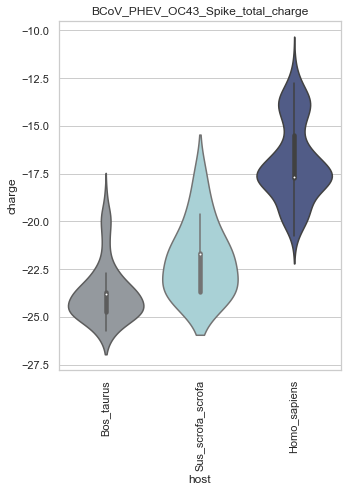

In [69]:
color_dictionary1 = {'Human_CoV_OC43': '#485690','PHEV':'#a2d7dd', 'BCoV':'#9299a0'}
  
sns.set(style="whitegrid")
my_order =['Bos_taurus','Sus_scrofa_scrofa','Homo_sapiens']
       
fig = plt.figure(figsize=(5,7))
plt.legend(loc='upper right', bbox_to_anchor=(1, 0.9))

# ax = sns.violinplot(x="Lineage", y="charge", color='#e45e32', data=df_Dec20_Feb21_full, dodge=False, order=my_order, s=5)
# ax = sns.violinplot(x="host", y="charge", hue="Country", data=df_MERSCoV_full, palette=many, order=my_order, dodge=False)
ax = sns.violinplot(x="host", y="charge", data=df_PHEV_full, hue = 'Lineage', palette=color_dictionary1, order=my_order, dodge=False)
ax = sns.violinplot(x="host", y="charge", data=df_BCoV_full, hue = 'Lineage',palette=color_dictionary1, order=my_order, dodge=False)
ax = sns.violinplot(x="host", y="charge", data=df_OC43_full, hue = 'Lineage',palette=color_dictionary1, order=my_order, dodge=False)

#sns.despine(offset=10, trim=True)
ax.legend_.remove()
ax.set_title('BCoV_PHEV_OC43_Spike_total_charge')

# plt.legend(loc='upper left', bbox_to_anchor=(1, 0.9))
# plt.legend(loc='upper right')
# plt.ylim(250, 500)
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('BCoV_PHEV_OC43_spike_total_charge_violin_plot_by_host.pdf',bbox_inches="tight") #bbox_inches="tight" important avoids cutoff
plt.savefig('BCoV_PHEV_OC43_spike_total_charge_violin_plot_by_host.jpg',bbox_inches="tight", dpi = 300) #bbox_inches="tight" important avoids cutoff


In [70]:
outprefix_MERSCoV = "MERS-CoV_Spike_charge"
df_MERSCoV_full = pd.read_csv('MERS-CoV_698_2022-1-27_spike_charge_table.csv', sep=",",index_col='Genome', na_values=['-'])
df_MERSCoV_full.head()


,charge
Genome,
OL622036|MERS_CoV|Saudi_Arabia|03-Apr-2019|Homo_sapiens,-17.25
OL622035|MERS_CoV|Saudi_Arabia|03-Jan-2017|Homo_sapiens,-17.25
MW545528|MERS_CoV|United_Arab_Emirates|2015|Camel,-16.18
MW545527|MERS_CoV|United_Arab_Emirates|2015|Camel,-16.18
MT226607|MERS_CoV|Saudi_Arabia|01-Feb-2017|Camel,-18.25


In [71]:
# add columns with details
# extract date
def extract_date (row):
    id_pieces1= (row['genome_id']).split("|")    
    return  id_pieces1[-2]

def extract_lineage (row):
    id_pieces2= (row['genome_id']).split("|")    
    return  id_pieces2[1]

def extract_country (row):
    id_pieces3= (row['genome_id']).split("|") 
    return id_pieces3[2]

def extract_host (row):
    id_pieces3= (row['genome_id']).split("|") 
    return id_pieces3[-1]
# Make column with contig_id from index

df_MERSCoV_full['genome_id'] = df_MERSCoV_full.index
                                     
# #apply to all rows 
# df_MERSCoV_full['Sample_date'] = df_MERSCoV_full.apply (lambda row: extract_date (row),axis=1)
# # # Sarbecovirus_variance_df['aa_Position'] = Sarbecovirus_variance_df.apply (lambda row: get_aa_position (row),axis=1)

# # #convert date string to datetime objecct
# df_MERSCoV_full['Sample_date'] = pd.to_datetime(df_MERSCoV_full['Sample_date'])


# #apply to all rows 
df_MERSCoV_full['Lineage'] = df_MERSCoV_full.apply (lambda row: extract_lineage (row),axis=1)

df_MERSCoV_full['Country'] = df_MERSCoV_full.apply (lambda row: extract_country (row),axis=1)

df_MERSCoV_full['host'] = df_MERSCoV_full.apply (lambda row: extract_host (row),axis=1)

df_MERSCoV_full.to_csv(outprefix_MERSCoV +'_sample_total_charge_date.csv', sep=',')
df_MERSCoV_full


,charge,genome_id,Lineage,Country,host
Genome,,,,,
OL622036|MERS_CoV|Saudi_Arabia|03-Apr-2019|Homo_sapiens,-17.25,OL622036|MERS_CoV|Saudi_Arabia|03-Apr-2019|Hom...,MERS_CoV,Saudi_Arabia,Homo_sapiens
OL622035|MERS_CoV|Saudi_Arabia|03-Jan-2017|Homo_sapiens,-17.25,OL622035|MERS_CoV|Saudi_Arabia|03-Jan-2017|Hom...,MERS_CoV,Saudi_Arabia,Homo_sapiens
MW545528|MERS_CoV|United_Arab_Emirates|2015|Camel,-16.18,MW545528|MERS_CoV|United_Arab_Emirates|2015|Camel,MERS_CoV,United_Arab_Emirates,Camel
MW545527|MERS_CoV|United_Arab_Emirates|2015|Camel,-16.18,MW545527|MERS_CoV|United_Arab_Emirates|2015|Camel,MERS_CoV,United_Arab_Emirates,Camel
MT226607|MERS_CoV|Saudi_Arabia|01-Feb-2017|Camel,-18.25,MT226607|MERS_CoV|Saudi_Arabia|01-Feb-2017|Camel,MERS_CoV,Saudi_Arabia,Camel
...,...,...,...,...,...
KF745068|MERS_CoV|France|07-May-2013|Homo_sapiens,-17.22,KF745068|MERS_CoV|France|07-May-2013|Homo_sapiens,MERS_CoV,France,Homo_sapiens
KC164505|BetaCoV_England_1|United_Kingdom|11-Sep-2012|Homo_sapiens,-18.21,KC164505|BetaCoV_England_1|United_Kingdom|11-S...,BetaCoV_England_1,United_Kingdom,Homo_sapiens
KC667074|Human_betaCoV_2c_England-Qatar/2012|United_Kingdom|19-Sep-2012|Homo_sapiens,-18.21,KC667074|Human_betaCoV_2c_England-Qatar/2012|U...,Human_betaCoV_2c_England-Qatar/2012,United_Kingdom,Homo_sapiens


In [72]:
df_MERSCoV_full['host'].value_counts()

Camel                              336
Homo_sapiens                       315
None                                 4
Homo_sapiens;_cell_line_Vero_p2      2
Lama_glama                           1
Name: host, dtype: int64

No handles with labels found to put in legend.


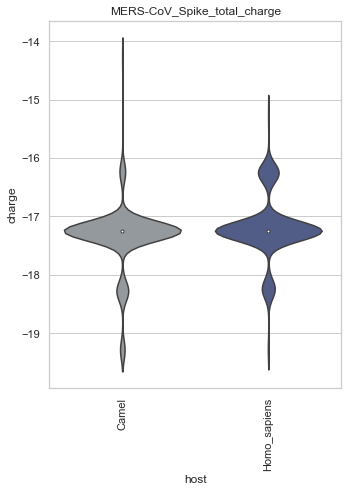

In [73]:
sns.set(style="whitegrid")
my_order =['Camel','Homo_sapiens']
           
fig = plt.figure(figsize=(5,7))
plt.legend(loc='upper right', bbox_to_anchor=(1, 0.9))

# ax = sns.violinplot(x="Lineage", y="charge", color='#e45e32', data=df_Dec20_Feb21_full, dodge=False, order=my_order, s=5)
# ax = sns.violinplot(x="host", y="charge", hue="Country", data=df_MERSCoV_full, palette=many, order=my_order, dodge=False)
# ax = sns.violinplot(x="host", y="charge", data=df_MERSCoV_full, palette=many, order=my_order, dodge=False)

ax = sns.violinplot(x="host", y="charge", data=df_MERSCoV_full, palette=color_dictionary2, order=my_order, dodge=False)

#sns.despine(offset=10, trim=True)
ax.legend_.remove()
ax.set_title('MERS-CoV_Spike_total_charge')

# plt.legend(loc='upper left', bbox_to_anchor=(1, 0.9))
# plt.legend(loc='upper right')
# plt.ylim(250, 500)
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('MERS-CoV_spike_total_charge_violin_plot_by_host.pdf',bbox_inches="tight") #bbox_inches="tight" important avoids cutoff
plt.savefig('MERS-CoV_spike_total_charge_violin_plot_by_host.jpg',bbox_inches="tight", dpi = 300) #bbox_inches="tight" important avoids cutoff

